In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.impute import KNNImputer

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

%matplotlib inline

./__notebook__.ipynb


# Data and Info

In [2]:
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,943.698,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,1401.970,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,NaN,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,770.469,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [3]:
df['class'].unique()

array(['water', 'forest', 'impervious', 'farm', 'grass', 'orchard'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          8000 non-null   int64  
 1   class       8000 non-null   object 
 2   20150720_N  7440 non-null   float64
 3   20150602_N  6800 non-null   float64
 4   20150517_N  7200 non-null   float64
 5   20150501_N  7040 non-null   float64
 6   20150415_N  7520 non-null   float64
 7   20150330_N  6880 non-null   float64
 8   20150314_N  7280 non-null   float64
 9   20150226_N  6640 non-null   float64
 10  20150210_N  7360 non-null   float64
 11  20150125_N  6960 non-null   float64
 12  20150109_N  7120 non-null   float64
 13  20141117_N  6720 non-null   float64
 14  20141101_N  7600 non-null   float64
 15  20141016_N  6560 non-null   float64
 16  20140930_N  7200 non-null   float64
 17  20140813_N  7440 non-null   float64
 18  20140626_N  6400 non-null   float64
 19  20140610_N  7520 non-null  

# Get Info on Missing Values

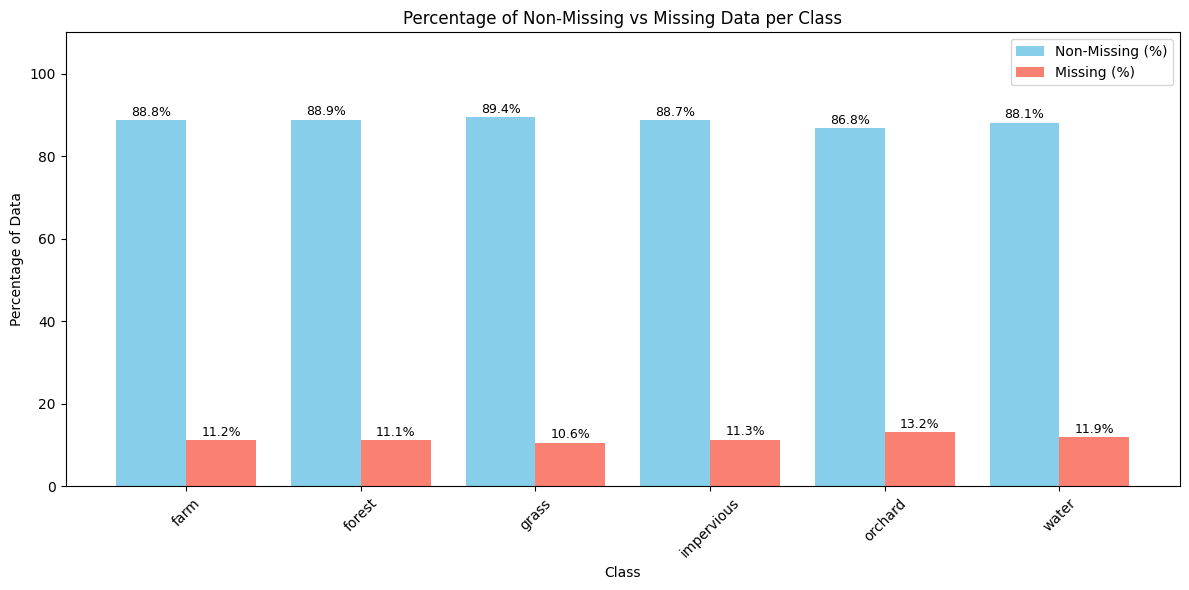

In [5]:
grouped = df.groupby('class')

# Total rows per class
total_per_class = grouped.size()

# Non-null counts per class (excluding 'class' column)
non_null_counts = grouped.count()
non_null_totals = non_null_counts.sum(axis=1)

# Total possible values = rows * number of features (excluding 'class')
total_possible = total_per_class * (df.shape[1] - 1)

# Calculate percentages
non_missing_pct = (non_null_totals / total_possible) * 100
missing_pct = 100 - non_missing_pct

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.4
classes = non_missing_pct.index
x = range(len(classes))

# Bars
bars1 = plt.bar(x, non_missing_pct, width=bar_width, label='Non-Missing (%)', color='skyblue')
bars2 = plt.bar([i + bar_width for i in x], missing_pct, width=bar_width, label='Missing (%)', color='salmon')

# Annotations
for bar in bars1:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# Labels and layout
plt.xlabel('Class')
plt.ylabel('Percentage of Data')
plt.title('Percentage of Non-Missing vs Missing Data per Class')
plt.xticks([i + bar_width / 2 for i in x], classes, rotation=45)
plt.ylim(0, 110)
plt.legend()
plt.tight_layout()
plt.show()

ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64 




<Axes: >

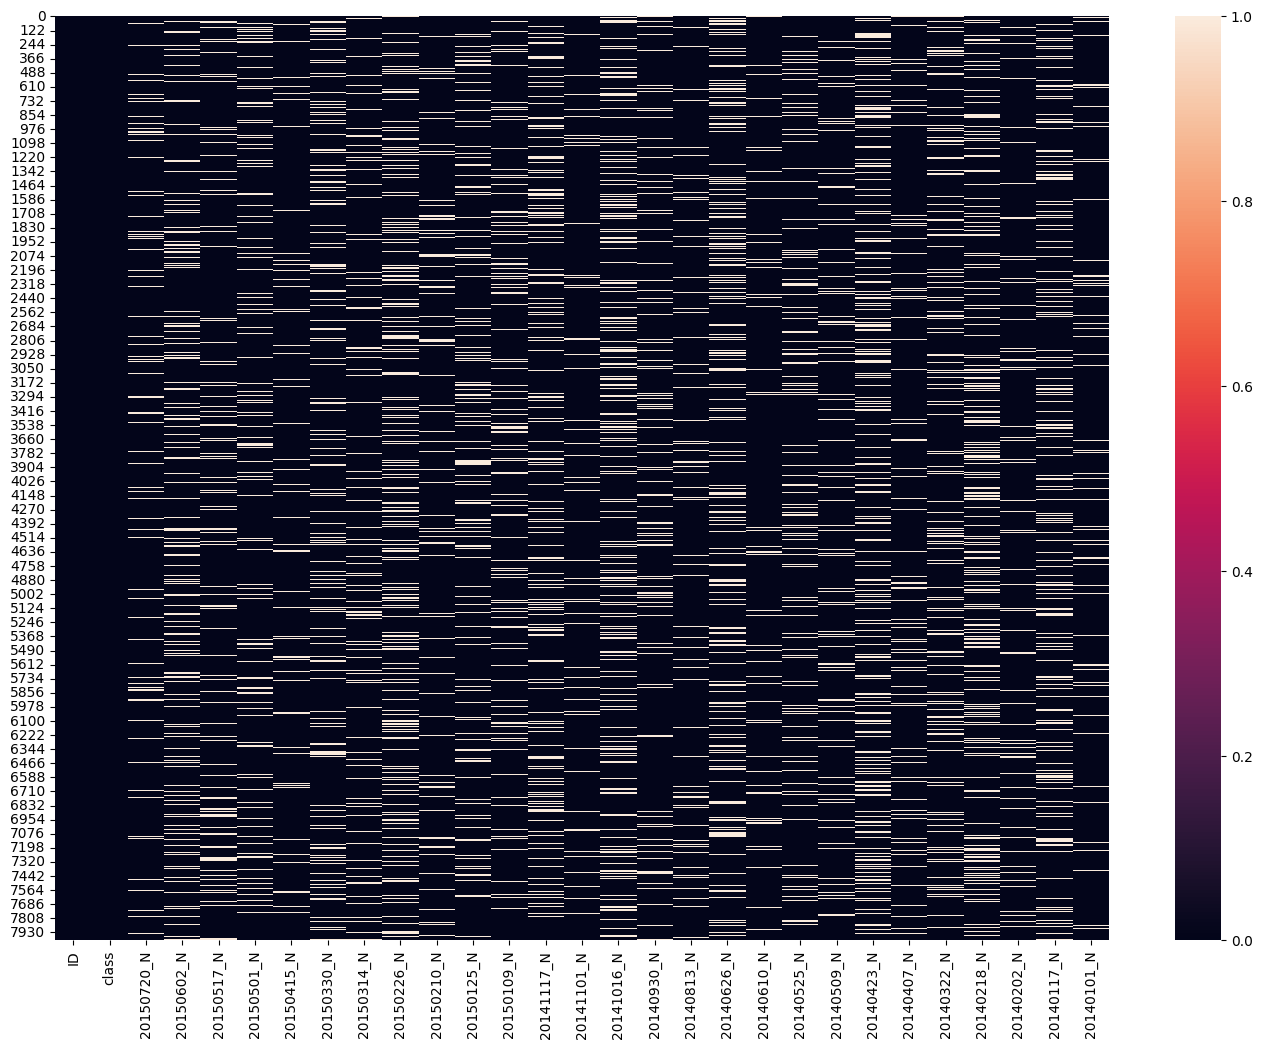

In [6]:
print(df.isnull().sum(), '\n\n')

# print(df[df.duplicated()])  # it is 0
plt.figure(figsize=(17, 12))
sns.heatmap(df.isnull())

In [7]:
print(df[['class']].value_counts())

class     
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64


In [8]:
# this was done after 'check changes in statistics', based on stuff that i felt like
 
df.fillna(df.median(numeric_only=True), inplace=True)

# Then forward fill and backfill remaining missing values
df.ffill(inplace=True)
df.bfill(inplace=True)

ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64 




<Axes: >

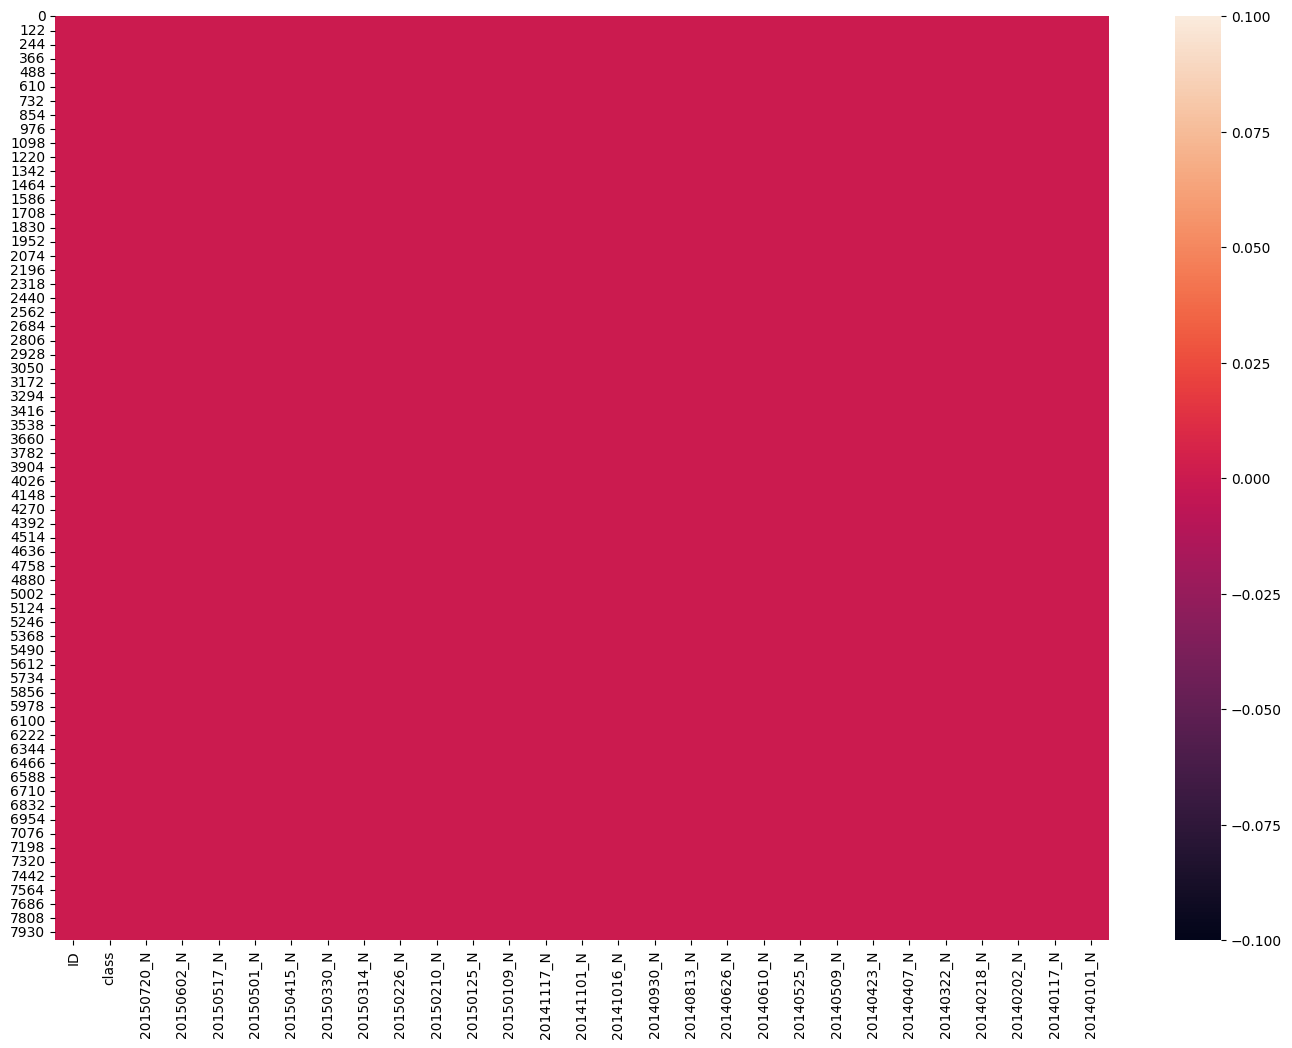

In [9]:
print(df.isnull().sum(), '\n\n')

# print(df[df.duplicated()])  # it is 0
plt.figure(figsize=(17, 12))
sns.heatmap(df.isnull())

# check changes in statistics


=== Summary of Statistical Differences (Original vs Imputed) ===

            Original_Mean  Imputed_Mean  Mean_Diff  Original_Std  Imputed_Std  \
20140101_N        2578.45       2521.52     -56.92       2436.27      2387.51   
20140117_N        2629.20       2463.00    -166.20       2386.15      2235.19   
20140202_N        6259.06       6306.80      47.74       1825.56      1769.08   
20140218_N        2144.36       1932.92    -211.44       2267.61      2102.39   
20140322_N        2799.82       2631.76    -168.06       2452.56      2312.22   
20140407_N        2041.32       1972.71     -68.61       2040.35      1970.81   
20140423_N        3055.17       2960.34     -94.83       2209.99      1959.92   
20140509_N        3012.18       2970.55     -41.63       2068.33      1954.84   
20140525_N        3674.89       3673.53      -1.36       2331.11      2223.72   
20140610_N        4872.68       4909.42      36.73       2776.14      2695.48   
20140626_N        2990.75       2931.27   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

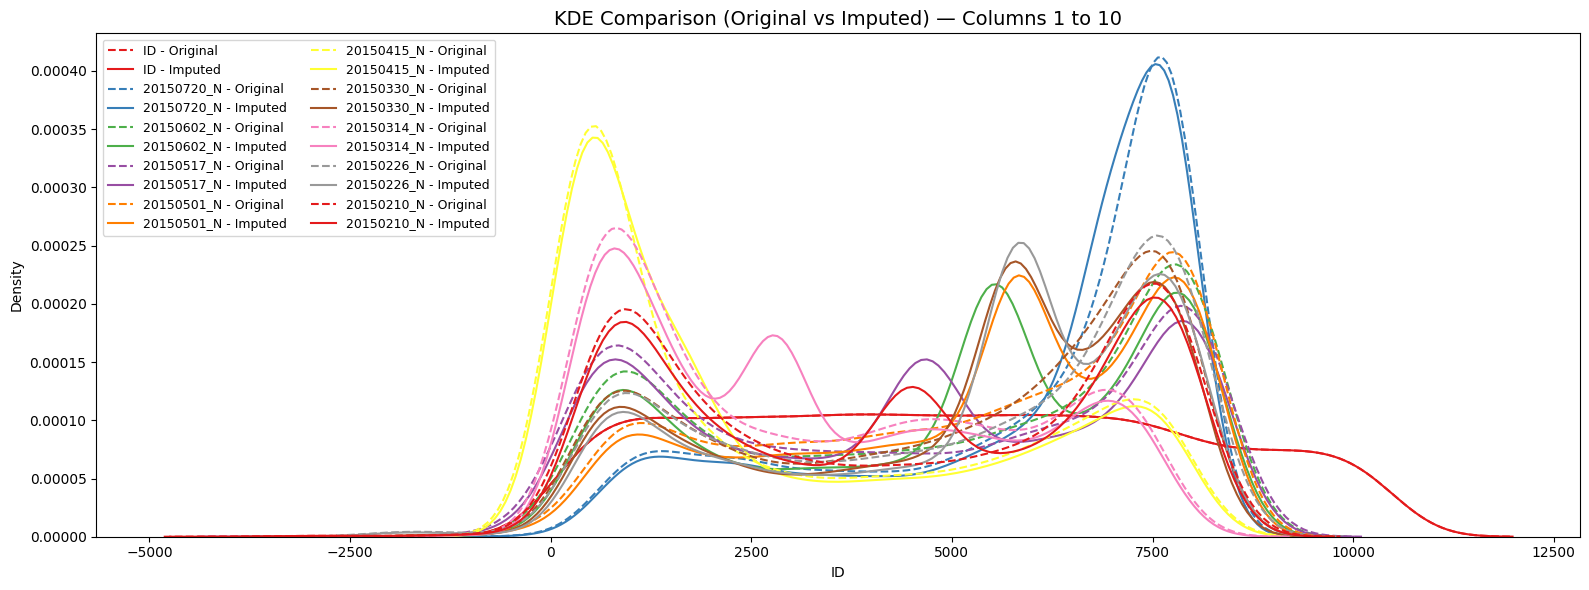

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

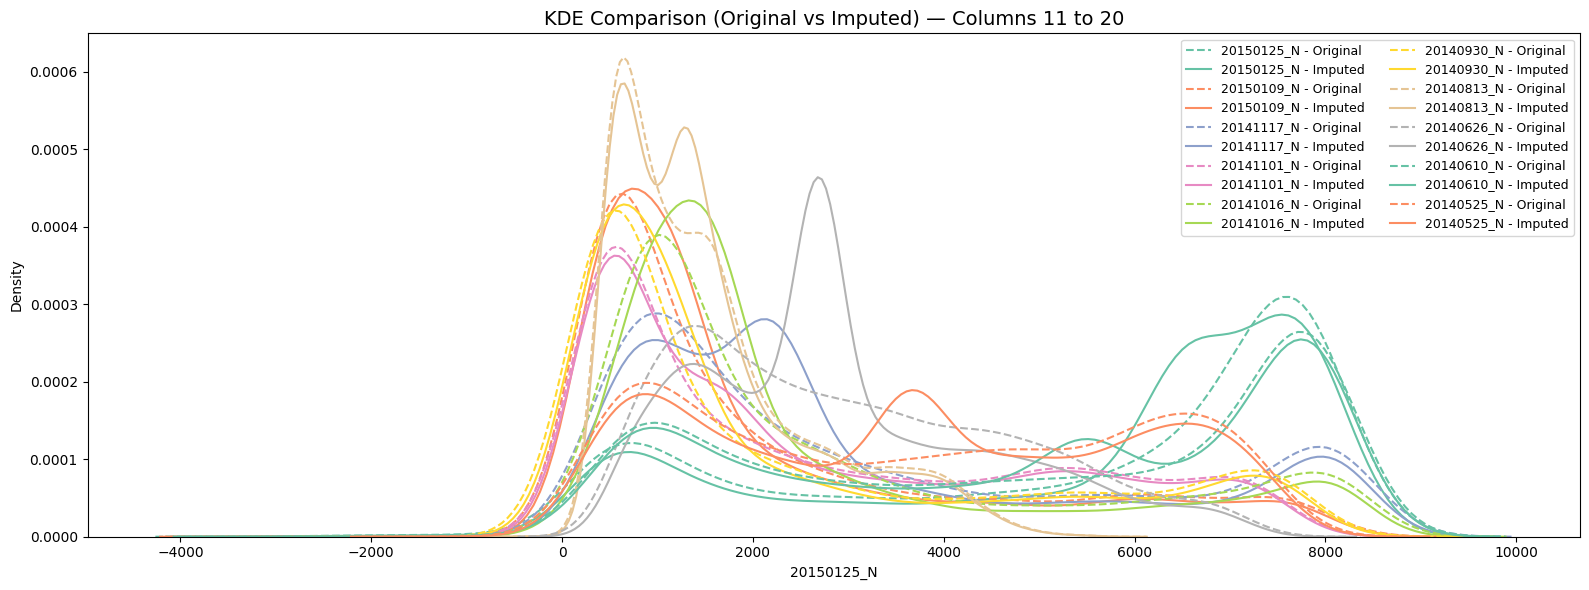

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

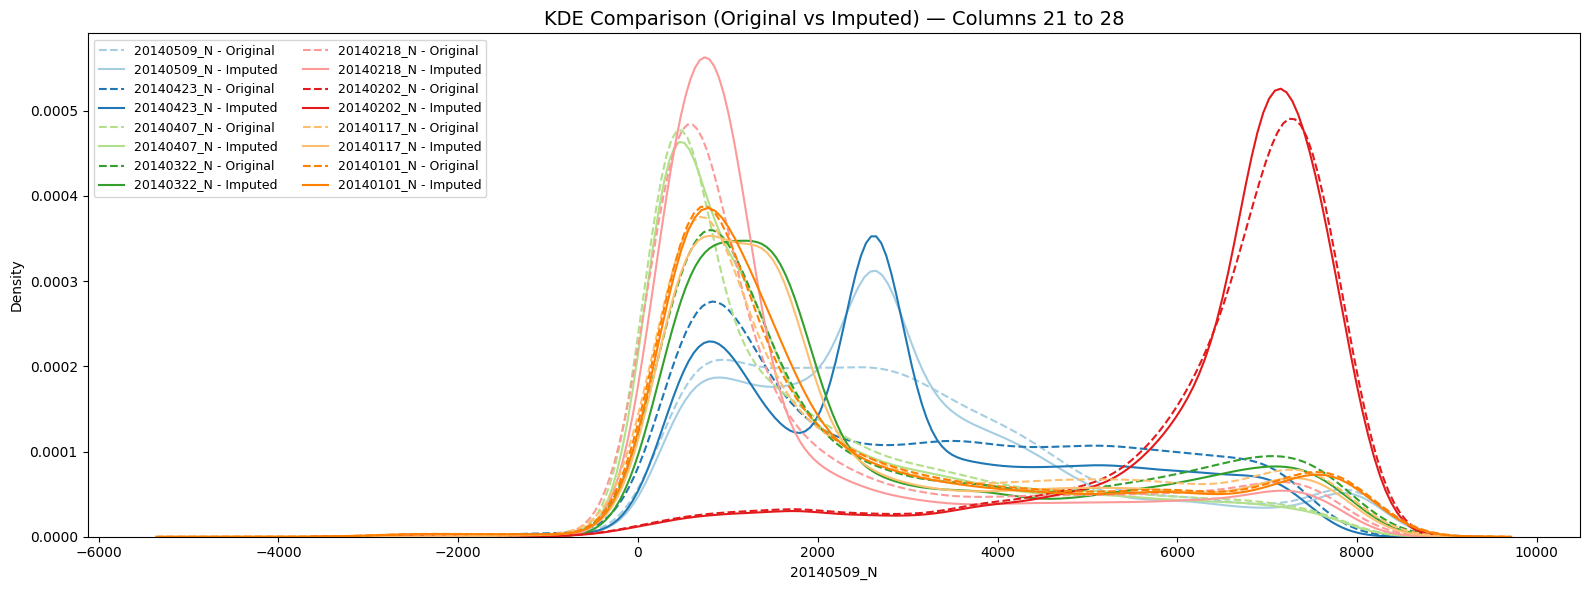

In [10]:
# Load original (non-imputed) data
df_original = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")  # Replace with your actual path

#df` is your imputed DataFrame (already in memory)

# Summary of statistics (unchanged)
summary = pd.DataFrame({
    'Original_Mean': df_original.mean(numeric_only=True),
    'Imputed_Mean': df.mean(numeric_only=True),
    'Mean_Diff': df.mean(numeric_only=True) - df_original.mean(numeric_only=True),
    'Original_Std': df_original.std(numeric_only=True),
    'Imputed_Std': df.std(numeric_only=True),
    'Std_Diff': df.std(numeric_only=True) - df_original.std(numeric_only=True)
}).round(2)

print("\n=== Summary of Statistical Differences (Original vs Imputed) ===\n")
print(summary)

# KDE Plots in 3 Batches
numeric_cols = df.select_dtypes(include='number').columns
batch_size = 10

# Define color palettes 
palettes = ['Set1', 'Set2', 'Paired']

for batch_idx, i in enumerate(range(0, len(numeric_cols), batch_size)):
    batch_cols = numeric_cols[i:i + batch_size]
    palette = sns.color_palette(palettes[batch_idx % len(palettes)], n_colors=len(batch_cols))

    plt.figure(figsize=(16, 6))
    for col, color in zip(batch_cols, palette):
        # Original with dashed line
        sns.kdeplot(df_original[col], label=f'{col} - Original', linestyle='--', color=color)
        # Imputed with solid line
        sns.kdeplot(df[col], label=f'{col} - Imputed', linestyle='-', color=color)

    plt.title(f'KDE Comparison (Original vs Imputed) — Columns {i+1} to {i+len(batch_cols)}', fontsize=14)
    plt.legend(ncol=2, fontsize=9)
    plt.tight_layout()
    plt.show()


# Model Training

In [11]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ————————————————————
# 1. Load & Prep
# ————————————————————
df = df.drop(columns=['Unnamed: 0', 'ID'], errors='ignore')

# Encode target
le = LabelEncoder()
y = le.fit_transform(df['class'])
X = df.drop(columns=['class'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# ————————————————————
# 2. Build Pipeline with Degree 2 PolynomialFeatures
# ————————————————————
pipe = Pipeline([ 
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('clf', LogisticRegression(
        solver='saga',
        penalty='l2',
        C=15,
        class_weight=None,
        max_iter=1000,
        multi_class='multinomial',
        n_jobs=-1
    ))
])

# ————————————————————
# 3. Train & Evaluate
# ————————————————————
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Parameters:")
print({
    "clf__solver": "saga",
    "clf__penalty": "l2",
    "clf__class_weight": None,
    "clf__C": 0.1
})

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Parameters:
{'clf__solver': 'saga', 'clf__penalty': 'l2', 'clf__class_weight': None, 'clf__C': 0.1}

Classification Report:
              precision    recall  f1-score   support

        farm       0.86      0.85      0.85       168
      forest       0.98      0.99      0.98      1232
       grass       0.83      0.62      0.71        39
  impervious       0.83      0.89      0.86       134
     orchard       0.75      0.50      0.60         6
       water       0.87      0.62      0.72        21

    accuracy                           0.95      1600
   macro avg       0.85      0.74      0.79      1600
weighted avg       0.95      0.95      0.95      1600



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [12]:
test_data = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
test_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.shape
 

(2845, 28)

In [13]:
test_data.columns

Index(['ID', '20150720_N', '20150602_N', '20150517_N', '20150501_N',
       '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N',
       '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N',
       '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N',
       '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N',
       '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [14]:
ID=test_data['ID']
test_data.drop(['ID'],axis=1,inplace=True)

In [15]:
y_test = pipe.predict(test_data)

In [16]:
y_decoded = le.inverse_transform(y_test)
y_decoded

array(['farm', 'orchard', 'orchard', ..., 'water', 'impervious',
       'impervious'], dtype=object)

In [17]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

In [18]:
result.to_csv("submission.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file